In [18]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


df=pd.read_csv("IEA-EV-dataEV salesHistoricalCars.csv")
print(type(df))

<class 'pandas.core.frame.DataFrame'>


In [19]:
#Data preprocessing
print(df.isnull().sum())
print(df.duplicated().any())
print(type(df))
#Conclusion: No missing values present in the dataset we can proceed with the data analysis and data prediction

region        0
category      0
parameter     0
mode          0
powertrain    0
year          0
unit          0
value         0
dtype: int64
False
<class 'pandas.core.frame.DataFrame'>


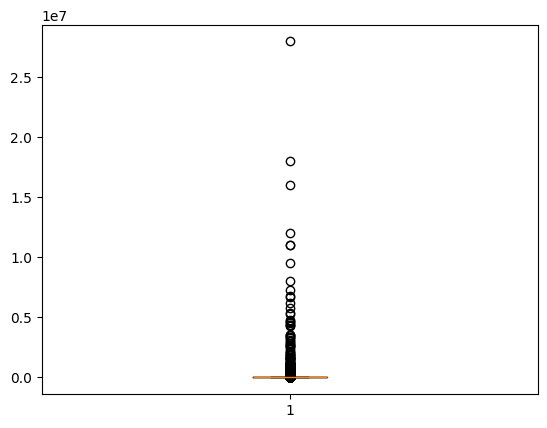

         region    category             parameter  mode powertrain  year  \
0     Australia  Historical              EV sales  Cars        BEV  2011   
1     Australia  Historical        EV stock share  Cars         EV  2011   
2     Australia  Historical        EV sales share  Cars         EV  2011   
3     Australia  Historical              EV stock  Cars        BEV  2011   
4     Australia  Historical              EV stock  Cars        BEV  2012   
...         ...         ...                   ...   ...        ...   ...   
3784      World  Historical  Oil displacement Mbd  Cars         EV  2022   
3789      World  Historical  Oil displacement Mbd  Cars         EV  2023   
3792      World  Historical              EV sales  Cars       FCEV  2023   
3795      World  Historical        EV sales share  Cars         EV  2023   
3796      World  Historical        EV stock share  Cars         EV  2023   

                        unit       value  
0                   Vehicles    49.00000  
1

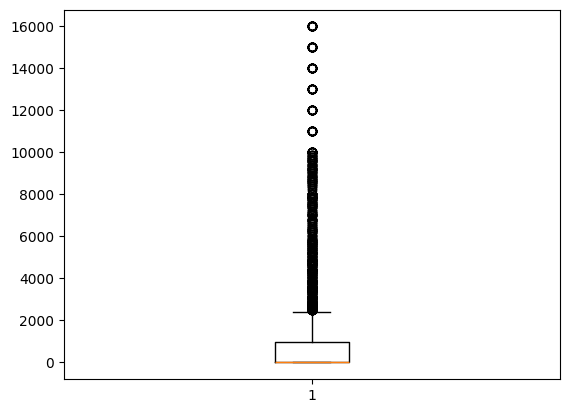

In [20]:
plt.boxplot(df['value'])
plt.show()

Q1=df['value'].quantile(0.25)
Q3=df['value'].quantile(0.75)
IQR=Q3-Q1
Lower_bound=Q1-1.5*IQR
Upper_bound=Q3+1.5*IQR
df=df[(df['value']>=Lower_bound)&(df['value']<=Upper_bound)]
print(df)
plt.boxplot(df['value'])
plt.show()

In [21]:
print(df.dtypes)

region         object
category       object
parameter      object
mode           object
powertrain     object
year            int64
unit           object
value         float64
dtype: object


In [22]:
X=df[['region','category','parameter','mode','powertrain','year']]
Y=df['value']

from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
ct=ColumnTransformer(transformers=[('encoder',OneHotEncoder(),[0,1,2,3,4])],remainder='passthrough')
X=ct.fit_transform(X)
X=X.toarray()
print(X)

from sklearn.model_selection import train_test_split
Xtrain,Xtest,Ytrain,Ytest=train_test_split(X,Y,test_size=0.2,random_state=42)
print(Xtrain)


[[1.000e+00 0.000e+00 0.000e+00 ... 0.000e+00 0.000e+00 2.011e+03]
 [1.000e+00 0.000e+00 0.000e+00 ... 0.000e+00 0.000e+00 2.011e+03]
 [1.000e+00 0.000e+00 0.000e+00 ... 0.000e+00 0.000e+00 2.011e+03]
 ...
 [0.000e+00 0.000e+00 0.000e+00 ... 1.000e+00 0.000e+00 2.023e+03]
 [0.000e+00 0.000e+00 0.000e+00 ... 0.000e+00 0.000e+00 2.023e+03]
 [0.000e+00 0.000e+00 0.000e+00 ... 0.000e+00 0.000e+00 2.023e+03]]
[[0.000e+00 0.000e+00 0.000e+00 ... 0.000e+00 0.000e+00 2.023e+03]
 [0.000e+00 0.000e+00 1.000e+00 ... 0.000e+00 1.000e+00 2.012e+03]
 [0.000e+00 0.000e+00 0.000e+00 ... 0.000e+00 0.000e+00 2.018e+03]
 ...
 [0.000e+00 0.000e+00 0.000e+00 ... 0.000e+00 1.000e+00 2.013e+03]
 [0.000e+00 0.000e+00 0.000e+00 ... 0.000e+00 0.000e+00 2.015e+03]
 [0.000e+00 0.000e+00 0.000e+00 ... 0.000e+00 0.000e+00 2.010e+03]]


In [23]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
Xtrain=sc.fit_transform(Xtrain)
Xtest=sc.transform(Xtest)
print(Xtrain)



[[-0.15063124 -0.15883155 -0.16666667 ... -0.43339292 -0.49381524
   1.60022497]
 [-0.15063124 -0.15883155  6.         ... -0.43339292  2.0250489
  -1.28636197]
 [-0.15063124 -0.15883155 -0.16666667 ... -0.43339292 -0.49381524
   0.28814   ]
 ...
 [-0.15063124 -0.15883155 -0.16666667 ... -0.43339292  2.0250489
  -1.02394497]
 [-0.15063124 -0.15883155 -0.16666667 ... -0.43339292 -0.49381524
  -0.49911098]
 [-0.15063124 -0.15883155 -0.16666667 ... -0.43339292 -0.49381524
  -1.81119596]]


In [24]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score,confusion_matrix
rg=RandomForestRegressor(n_estimators=1000,random_state=42)
rg.fit(Xtrain,Ytrain)
ypred=rg.predict(Xtest)
print(r2_score(Ytest,ypred))

0.7096608953456072


In [25]:
from xgboost import XGBRegressor
xgbr=XGBRegressor()
xgbr.fit(Xtrain,Ytrain)
ypred=xgbr.predict(Xtest)
print(r2_score(Ytest,ypred))


0.7832767812896024
